In [1]:
using DataFrames
using PyPlot

# Free Fall - 1d

$$
x(t+ \Delta t) = x(t) + v(t) \Delta t
$$

$$
v(t+ \Delta t) = v(t) + a(t) \Delta t
$$

$a(t) = F(t)/m$



In [280]:
tend = 1
dt = 0.002
a = -9.81 # g

# Initial Condition
data = DataFrame(t = 0.0, x = 0.0, v = 3.0)

# Sequential Update
while true
    state = data[nrow(data), :]
    
    t = state.t + dt
    x = state.x + state.v * dt
    v = state.v + a * dt
    
    push!(data, (t, x, v))
    t >= tend && break
    v < 0 && break
end

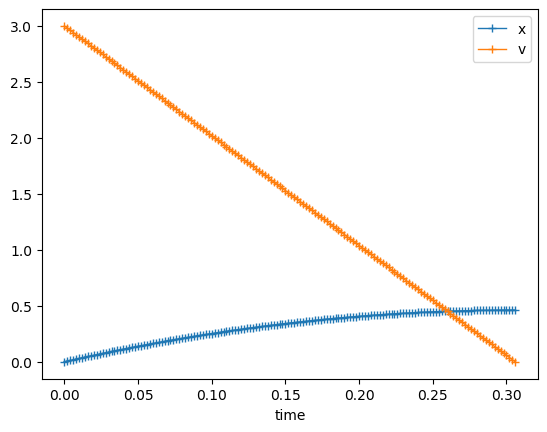

In [281]:
plot(data.t, data.x, marker = "+", linewidth = 1, label = "x")
plot(data.t, data.v, marker = "+", linewidth = 1, label = "v")
xlabel("time")
legend()
ylabel("");

# Friction - 1d

In [302]:
tend = 5
dt = 0.02

μ = 5.0  # = 0.5 * flaeche * ... 
λ = 5.0  # haftreibung

data = DataFrame(t = 0.0, x = 0.0, v = 3.0)

while true
    state = data[nrow(data),:]
    
    f_friction = - μ * state.v^2 - λ * state.v 
    
    t = state.t + dt
    x = state.x + state.v * dt
    v = state.v + f_friction * dt
    
    
    push!(data, (t, x, v))
    t >= tend && break
end

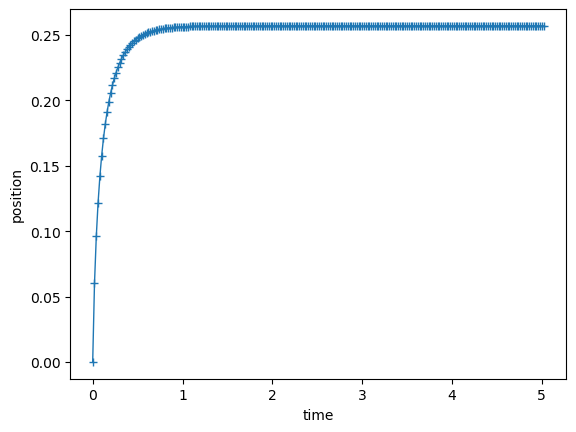

In [303]:
plot(data.t, data.x, marker = "+", linewidth = 1)
xlabel("time")
ylabel("position");

# Two Cars

In [405]:
tend = 1
dt = 0.001


data = DataFrame(t = 0.0, x1=0.0, v1=2.0, x2=1.0, v2=0.0)

d_feder = 0.2
μ = 300

while true
    state = data[nrow(data),:]
    
    t = state.t + dt
    x1 = state.x1 + state.v1 * dt
    x2 = state.x2 + state.v2 * dt
    
    d = abs(state.x1 - state.x2) 
    if d > d_feder
        f = 0
    else
        f = μ * (d_feder - d)
    end
    
    v1 = state.v1 - f * dt 
    v2 = state.v2 + f * dt
        
    push!(data, (t, x1, v1, x2, v2))
    t >= tend && break
end

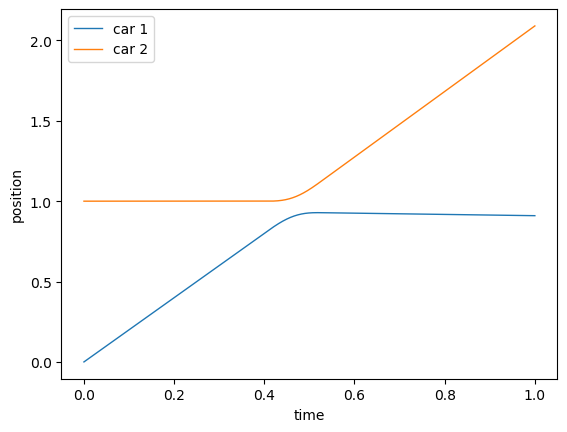

PyObject <matplotlib.legend.Legend object at 0x7fb618702110>

In [406]:
plot(data.t, data.x1, linewidth = 1, label = "car 1")
plot(data.t, data.x2, linewidth = 1, label = "car 2")


xlabel("time")
ylabel("position")
legend()

In [376]:
data_sparse = data[1:500:100000,:];

In [377]:
nrow(data_sparse)

200

In [378]:
using PyPlot
using PyCall
using Base64
using Printf

anim = pyimport("matplotlib.animation")

function showanim(filename)
    base64_video = Base64.base64encode(open(filename))
    display("text/html", """<video controls src="data:video/x-m4v;base64,$base64_video">""")
end

showanim (generic function with 1 method)

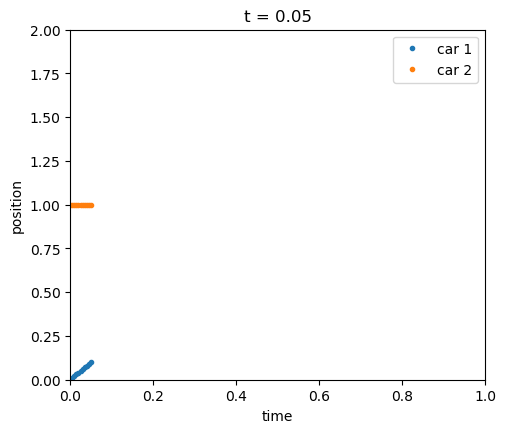

In [379]:
fig = figure(figsize=[5, 5])
    
w1 = 0.1
w2 = 0.02


function animate(i)
    fig.clf()
    ax = fig.add_axes([0.15, 0.15, 0.83, 0.7])
    ax.set_xlim(0, 1)
    ax.set_xlabel("time")
    ax.set_ylim(0, 2)
    ax.set_ylabel("position")


    last_row_to_plot = i+1
    
    t = data_sparse[last_row_to_plot, "t"]
    t_str = @sprintf "%.2f" t
    ax.set_title("t = $t_str")

    ax.plot( data_sparse[1:last_row_to_plot, "t"], data_sparse[1:last_row_to_plot, "x1"], 
        label = "car 1", marker = ".", linestyle="")
    ret = ax.plot( data_sparse[1:last_row_to_plot, "t"], data_sparse[1:last_row_to_plot, "x2"], 
        label = "car 2", marker = ".", linestyle="")
    ax.legend()
    
    ret
end

animate(10);

In [381]:
frames = nrow(data_sparse)

myanim = anim.FuncAnimation(fig, animate, frames=frames, interval=25, blit=true)
myanim.save("test1.mp4", bitrate=-1, extra_args=["-vcodec", "libx264", "-pix_fmt", "yuv420p"])

showanim("test1.mp4")

<video controls src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAAW3VtZGF0AAACrgYF//+q3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE1OSByMjk5OSAyOTY0OTRhIC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMCAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTYgbG9va2FoZWFkX3RocmVhZHM9MSBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxhY2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHlyYW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTI1IHNjZW5lY3V0PTQwIGludHJhX3JlZnJlc2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAuNjAgcXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAATGWWIhAAv//72rvzLK0cLlS4dWXuzUfLoSXL9iDB9aAAAAwAAAwA8CevrPDqWxk2AAAHbACW5ptOkV4DZgJ+qKX+pp2fkAiwGuOJ5hKXRNoCH9zuCilaY+MnvPdZuggN6S4YORy1paYY7xyqYgwkKSCLL5yWwe2mXQG9WcvBuSNG46J7cMD1NRWgh7x0ZSdVDej2xpPqesNzQCy1cSnrUB0CAyKlPIvATJNWTSex52WPz1TPAIU60ZXTJKA1zgqSei9l8rGUEJdUg+k0lw9swGCLCQI4mFNHNeVP2mOUqf9cAtu+hxp7ATZMYEJZ69GDnUGmXTIv8kaFsZAxiY/89i4QIxXhLfoRJEoxydQ6KrjST2s7M7pHnXN++msUC586izTrqNiLDzfT5mrjBPHd16L5uQVemm7pfj8qvc3vmOy2pj29zT5y3EObLPwQ7Vb4j6E/n4CqWU6ecgEX/YItbMX9TDiOYBYlV7uWbjt3nBw8tlMONsHhI97o0q5V8EhQtvrmyodakVXcA9ubM5jiMl/I6JygPYIhZ362CP+vKCZD4ydFhmnJu+smYpV0HaGks+2jaVVXIWOwviN9GD8SrBFCnepQUUMCssyqxLWG8vAJeDjtDwxIKt+YFwuVkpT75ibI9gGh6NZaclmtzjIaQG1k0bkGupQEjihtby7V87AdsBuybAa6D13ZNUJfhaXRqMX6CnssccgttEWkV+MAlCZgSyt+p0X6nfoip75Ro9oMV2Hw4dSwz2pFr/wUQZpeqYKtlf5OAhghFBwTwGJZ16cbajrbYht6CeImaI8tVdGPcFfFtRxx48DyNcLI1kKaAJNUa+3hVQT6PXpKC6YJY/DNT7ubuJx1GlFFRRwxpjsE/pQ55fPUL0P7/CT9Z3vgAAQP6tH/hQxHXgARb5BFAWZde7QlvnPrf+MhD05EdIH7Kl7vFfHdYrRGTV+K6np2ZWid0xs7urE6qxXuSMhMkjwZSxxSjXzWK6XWkLD1/oDo2NWqDxx47VqSo8EgNoBFLusHxvABorNX3nIxYT3ltqXueKJvO656v7VbaZmr7lPquSEd/s3WApMP8LqPAY0bnOCuoMWpxNrCl+Q0sexD3SV9EiEEPHFwYxm2tJ6ph60VrfpbHI2z5PEMRkh9460llkeQYisGfPYAiGyXE0RPw6kfbPkCOOdSgQULPczebdclLJejEt70pxfMV0uBUA3EYcAIX4GjD+QfnwSzSjJrAAAPHjBdGi3/7v1aDvO4JcLlgG2de1qxOOZGTFkExR58m8onDxzXMTrF4mGL5lYcvLJBc1qlfUjhvlRC0f8eT3A5GPkl6PTNFkSMpXs1RI1WIsZGtRSWdIexBR7zORRQIGgxrXIStC3LOEPWdX52uLRm4uDdCA3AiTckEaVgUbKMcC6Bd4TTyF0q53vFymxQoZ7qH29iHwz95Mxlo7vFISKJ+sFg7rNheRkPxLMa6UnuQXpsj75Ez6BHAOPovvAlqXkez9dNEnNlZ9xZI3vr7spLt65wGXlEjaLrjlXGhC+kPahEfiFkWhtOvWI0zclN+m7V+UcJmYc7YlsHOCmL9LQSIh4GuC6ZQyXUjPmhqSU9R7BfLj2InvpTALu/NCAMuQf/a97dWC7D1iySobxj+a0e4Hbe9EP6LALpCodFjsnxh07vA0Rk7kDiV01Wo415K6Gfu3bfMMqC0djDVHHDXM/69yWx2t/19FW9IQZYusY3h8Qo5vGOUKH/mq9EPZEOooyfTfI0DBQjeqwAAAwGJ2L5KFlfSJW0b0GGCN/8W6NDDCaIhw04utQDQKZ4qvBH0tLaRZ4AQxbTTxVQFb6y9+1iaeBHFIC87TKu6O9oBeBlka+JRvaAMAGcXeNcU8w6/pjzqTCzTt1xnVfjjC1L1sFoKMNCcr2Q4yyTNWPDEGKuryY4VcyFBvCOHJ90mHkbt1usXONUuOX2hXZ+x2B1K6Z0MJaSz4VP3OJntx7Wyj2iiQ/ZJBPPIP6VOp0qO57FIJSR8oYPpxyAHwyOcmE5YqUPECsCGSU+tytc5LoXE5bYFl37vwSDgZCPkodYvmbACOP6VKImYw6hWWbvlGDbZMuFvotfS/LUjSDFlXnpRIKGLn4YRU5z0z4BwXFuOvEnDO//+smhTu72n8l0bMxPO7jHlfQMWLgk/IRIHKKajfeFDNU75EBKB6KvdjC8sLpQScTlEpxJ2lr5rYYJAw3/TWWN7znJh5UUfhfDwN207m8XEF73kGwD65AB+q2Ujs3qFW4nqAKgoWjMim6T8tj116UvP/gihm6ZcehS7HlQGrocYvkyo/Y01tzBZy/EZUfaEF0GFP31WMHwzqxIgXQ2qgMMR02emzTxuizELOitnhKsj53oPu3bk5VfGerd+Eb6+qp1eJiWXMOPZiSbNlJwgJxPsI/6qc+6XYN9eXI9CEQBCm0GWUMIhkoUg72N793dd4FtIXaO+1k4iIAAGOfMAxLFipWiCY7znKFogJQbb7+Lq6sQux3qm8aE+5Ydc+3DO+U5jPiW+Y/7os3qztCrF+WJKJ7lTjrKWNRGbBFu01sHvgeKAhnT2T0l1raU82oQPPnbHDjNKaJua+6N7exLheHc5Umiyt9JgUxQxC9MtJa5tCbhnuRigsyhe7NftEPdNGJaytJAGnnwYFk8ysZ3dCV/iUQYz/dXMh1rrnSLt3wYZfm/HM2aknqRRAFFwRpG7TCwYQR/Ll66K/PhS8zXhknhzTDcqlLdRiCYNaxiqzQbQQr4tbqBsJBAPljksgWU5vojW1qysBWHx4JgS/+w9lnCyMgzcZ1y5Keb6vzgjX8P9p4bCV9DkT2cmhX7Rjba0/P3D6guJAMeK0UztMlCVQLZfS/NPzrKVccd7DWeEmb9nlHGZZveXvpcGojYQfjX8l/AAGEmSE4w99iw7bildFQYA9l/dRFBBt2+RRbJVQTrs3DJM48vc8rx0aWL6NgjwO7u